<a href="https://colab.research.google.com/github/MAGESHD2710/Enhancing-road-safety-with-AI-driven-traffic-accident-analysis-and-prediction-Magesh-D/blob/main/Phase_3_Enhancing_Road_Safety_with_AI_Driven_Traffic_Accident_Analysis_and_Prediction_Magesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -----------------------------------------------
# Enhancing Road Safety with AI-Driven Traffic Accident Analysis and Prediction
# -----------------------------------------------

# 1. Install required libraries if missing
!pip install pandas numpy matplotlib seaborn scikit-learn openpyxl joblib --quiet

# 2. Import Libraries
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LinearRegression

import os

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


In [ ]:

from google.colab import files

uploaded = files.upload()


# Set the file path
file_path = "traffic_accidents_dataset3.xlsx"  # Make sure the file is already in your Colab environment

# Load the Excel file
df = pd.read_excel(file_path)

print(f"✅ Dataset '{file_path}' loaded successfully!")
print("Shape:", df.shape)
df.head()

Saving traffic_accidents_dataset3.xlsx to traffic_accidents_dataset3.xlsx
✅ Dataset 'traffic_accidents_dataset3.xlsx' loaded successfully!
Shape: (12000, 14)


,Accident_ID,Date,Time,Location_Latitude,Location_Longitude,Weather_Condition,Road_Type,Light_Condition,Accident_Severity,Vehicle_Type_Involved,Primary_Cause,Number_of_Vehicles,Number_of_Casualties,Speed_Limit
0,A100000,2019-12-24,00:20:19,43.646852,-107.995162,Rain,Suburban,Dusk,Minor,Motorcycle,Distracted Driving,2,4,40
1,A100001,2017-11-22,02:37:30,44.937617,-111.202751,Storm,Rural,Daylight,Major,Car,Weather,3,5,50
2,A100002,2017-02-20,19:38:06,35.217977,-79.577378,Windy,Urban,Darkness,Major,Motorcycle,Distracted Driving,4,8,30
3,A100003,2020-02-24,17:12:56,41.933872,-87.158556,Fog,Mountain,Darkness,Fatal,Bus,Mechanical Failure,3,1,50
4,A100004,2020-10-15,07:14:23,40.464784,-105.163820,Rain,Suburban,Dusk,Minor,Pedestrian,DUI,1,1,80


In [ ]:
# Drop non-informative columns
df.drop(['Accident_ID', 'Time'], axis=1, inplace=True)

# Extract Year from Date
df['Year'] = pd.to_datetime(df['Date']).dt.year
df.drop('Date', axis=1, inplace=True)

# Encode categorical columns
categorical_cols = ['Weather_Condition', 'Road_Type', 'Light_Condition', 'Vehicle_Type_Involved', 'Primary_Cause', 'Accident_Severity']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

print("✅ Data preprocessing completed.")
df.head()

✅ Data preprocessing completed.


,Location_Latitude,Location_Longitude,Weather_Condition,Road_Type,Light_Condition,Accident_Severity,Vehicle_Type_Involved,Primary_Cause,Number_of_Vehicles,Number_of_Casualties,Speed_Limit,Year
0,43.646852,-107.995162,3,3,3,2,3,1,2,4,40,2019
1,44.937617,-111.202751,5,2,2,1,2,6,3,5,50,2017
2,35.217977,-79.577378,6,4,0,1,3,1,4,8,30,2017
3,41.933872,-87.158556,2,1,0,0,1,2,3,1,50,2020
4,40.464784,-105.163820,3,3,3,2,4,0,1,1,80,2020


<ipython-input-14-d189bb74e965>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Accident_Severity', palette="coolwarm")


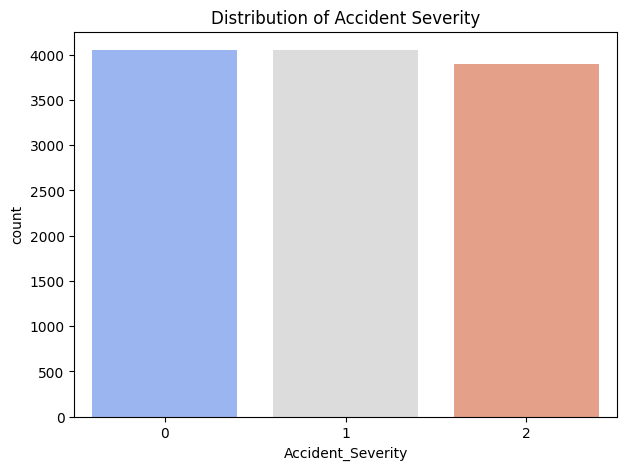

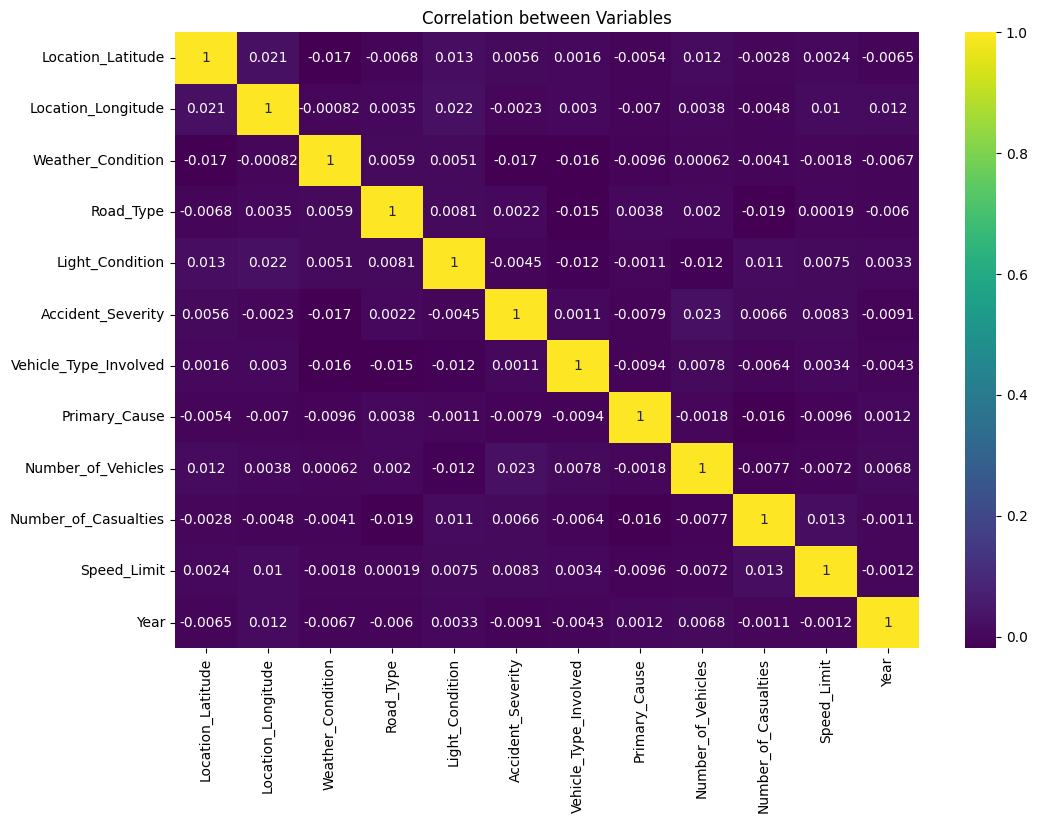

In [ ]:
# Accident Severity Distribution
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='Accident_Severity', palette="coolwarm")
plt.title("Distribution of Accident Severity")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.title("Correlation between Variables")
plt.show()

In [ ]:
# Split Data
X = df.drop('Accident_Severity', axis=1)
y = df['Accident_Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=150, max_depth=12, random_state=42)
rf_model.fit(X_train, y_train)

print("✅ Random Forest Model trained.")

✅ Random Forest Model trained.


Accuracy: 0.34

Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.35      0.35       827
           1       0.35      0.39      0.37       813
           2       0.32      0.27      0.29       760

    accuracy                           0.34      2400
   macro avg       0.34      0.34      0.34      2400
weighted avg       0.34      0.34      0.34      2400



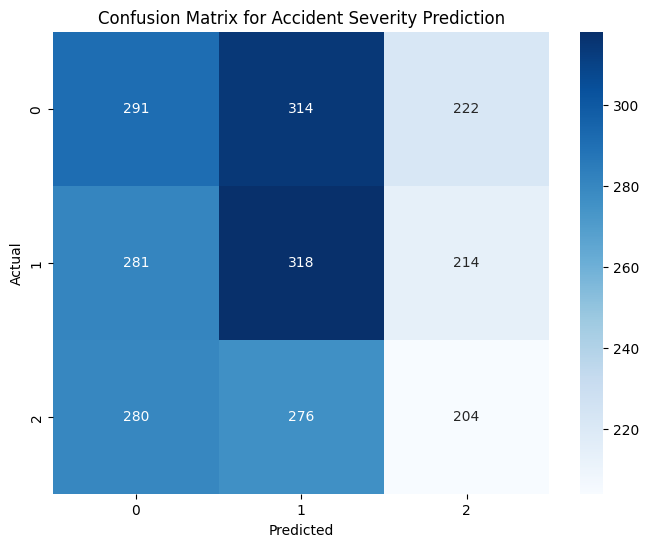

In [ ]:
# Predictions
y_pred = rf_model.predict(X_test)

# Accuracy and Report
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix for Accident Severity Prediction')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<ipython-input-17-9837c8553b56>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")


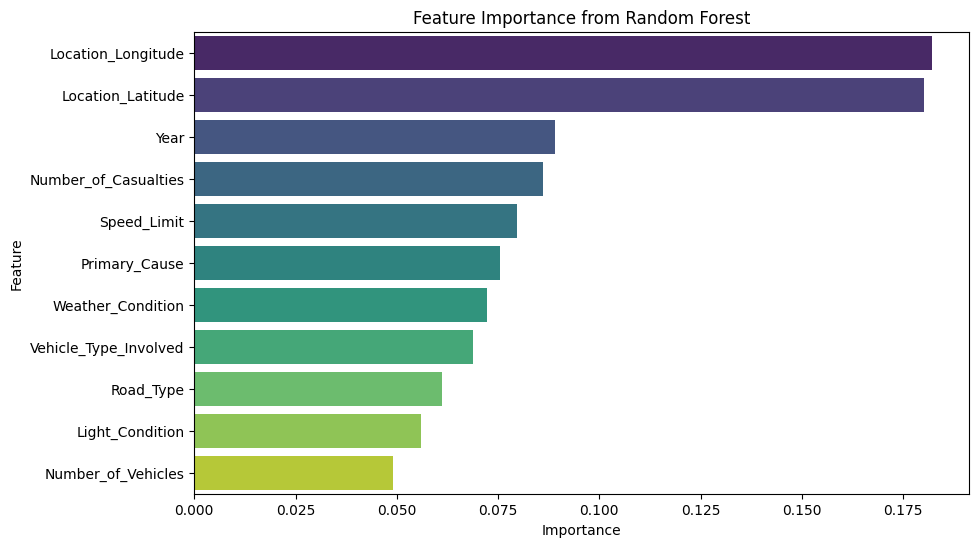

In [ ]:
# Feature Importance
importances = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="viridis")
plt.title('Feature Importance from Random Forest')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


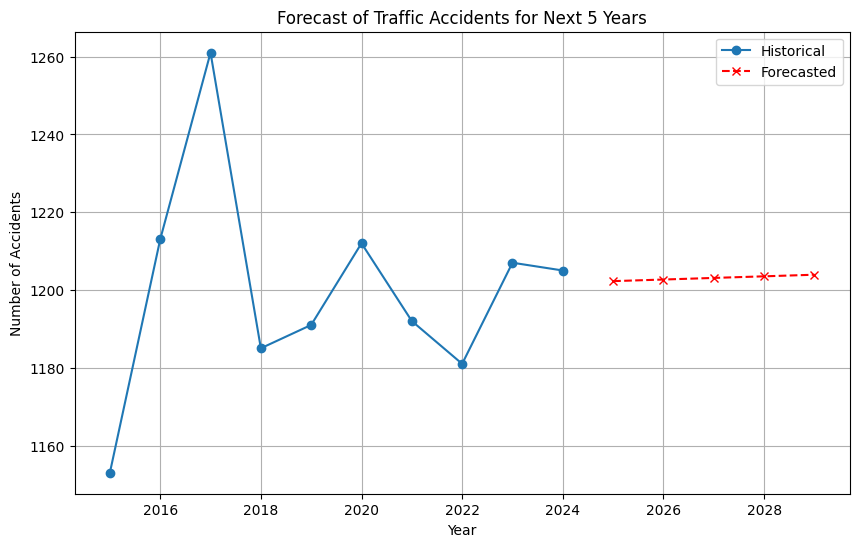


📈 Future Accident Forecast:

   Year  Predicted_Accidents
0  2025                 1202
1  2026                 1202
2  2027                 1203
3  2028                 1203
4  2029                 1203


In [ ]:
# Group by Year
accident_counts = df.groupby('Year').size().reset_index(name="Accident_Count")

# Linear Regression for Forecasting
lin_reg = LinearRegression()
lin_reg.fit(accident_counts[['Year']], accident_counts['Accident_Count'])

# Predict Next 5 Years
future_years = np.array(range(df['Year'].max()+1, df['Year'].max()+6)).reshape(-1, 1)
future_predictions = lin_reg.predict(future_years)

# Plot Forecast
plt.figure(figsize=(10,6))
plt.plot(accident_counts['Year'], accident_counts['Accident_Count'], marker='o', label="Historical")
plt.plot(future_years, future_predictions, marker='x', linestyle='--', color='red', label="Forecasted")
plt.title("Forecast of Traffic Accidents for Next 5 Years")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")
plt.legend()
plt.grid()
plt.show()

# Show predictions
forecast_df = pd.DataFrame({
    "Year": future_years.flatten(),
    "Predicted_Accidents": future_predictions.astype(int)
})

print("\n📈 Future Accident Forecast:\n")
print(forecast_df)

In [ ]:
# Save Random Forest model
joblib.dump(rf_model, 'random_forest_accident_severity.pkl')

# Save Linear Regression model
joblib.dump(lin_reg, 'accident_forecast_model.pkl')

# Download models (Optional)
files.download('random_forest_accident_severity.pkl')
files.download('accident_forecast_model.pkl')